# Stage 1: Data wrangling

## Load Data from CSVs

We could use this code three time, but every time you repeat something it is a good moment to create function. The if we find bug we can solve it in one place.

In [394]:
import unicodecsv

def read_csv(path):
    with open(path, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        data = list(reader)
    return data

enrollments = read_csv("enrollments.csv")
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', '2014-11-10'),
             ('cancel_date', '2015-01-14'),
             ('days_to_cancel', '65'),
             ('is_udacity', 'True'),
             ('is_canceled', 'True')])

In [395]:
daily_engagement = read_csv("daily_engagement.csv")    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015-01-09'),
             ('num_courses_visited', '1.0'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0.0'),
             ('projects_completed', '0.0')])

In [396]:
project_submissions = read_csv("project_submissions.csv")
project_submissions[0]

OrderedDict([('creation_date', '2015-01-14'),
             ('completion_date', '2015-01-16'),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Fixing Data Types
Data types of some fields like join_date (date), days_to_cancel (int), is_udacity (bool) are incorrectly classified as string. We need to fix it.

It is better to do it upfront - we avoid data type confusion later.

In [397]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

OrderedDict([('account_key', '448'),
             ('status', 'canceled'),
             ('join_date', datetime.datetime(2014, 11, 10, 0, 0)),
             ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('days_to_cancel', 65),
             ('is_udacity', True),
             ('is_canceled', True)])

In [398]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
             ('num_courses_visited', 1),
             ('total_minutes_visited', 11.6793745),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [399]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

# Stage 2: Questions we can now ask about data

What fraction of students does not cancel nanodegree.

What fraction of students cancel nanodegree.

What is the average time / distirbution times to cancel?

What is the average time / distirbution times without canceling?

What is the difference in engagement patterns between those who cancel and those who did not?

Did those who did not cancel were more engaged in courses activity than those who canceled?

Did those who did not cancel were more active in additional courses?

How many courses did take people who cancel and those who did not.

How many minutes were they engaged daily/weekly/monthly (+ distirbution)?

How many lessons did they finish daily/weekly/monthly (+distribution)?

How many projects did they submitted daily/weekly/monthly (+distribution)?

Were succesful students active in any way in a more regular way that those who cancel?

What is the difference between these two groups in terms of number of submision blank/incomplete/ungraded vs. passed/distiction.

What is the ratio between submision finished vs. submision unfinised in successful and canceling users.

How much time student spend on udacity courses.

How long does it take from starting the course to finishing it.

How long to submit project.

How time spent relates to number of lessons or projects submitted.

How engagement changes over time.

### How students who pass projects differ from those who did not.

# Stage 3 - Data wrangling again

In [400]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

enrollments_rows_n = len(enrollments)
enrollments_unique_students_n = len(set([enrollment['account_key'] for enrollment in enrollments]))
print("enrollments_rows_n", enrollments_rows_n)
print("enrollments_unique_students_n", enrollments_unique_students_n)

daily_engagement_rows_n = len(daily_engagement)
daily_engagement_unique_students_n = len(set([daily_engagement_element['acct'] for daily_engagement_element in daily_engagement]))
print("daily_engagement_rows_n", daily_engagement_rows_n)
print("daily_engagement_unique_students_n", daily_engagement_unique_students_n)

project_submissions_rows_n = len(project_submissions)
project_submissions_unique_students_n = len(set([project_submission['account_key'] for project_submission in project_submissions]))
print("project_submissions_rows_n", project_submissions_rows_n)
print("project_submissions_unique_students_n", project_submissions_unique_students_n)

enrollments_rows_n 1640
enrollments_unique_students_n 1302
daily_engagement_rows_n 136240
daily_engagement_unique_students_n 1237
project_submissions_rows_n 3642
project_submissions_unique_students_n 743


Problems:

A) enrollments_unique_students_n > daily_engagement_unique_students_n -> daily engagement should cover all user - also those who did not do anything

B) different names for account_key and acct

## Problems in the Data

In [401]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".

daily_engagement[1]

OrderedDict([('acct', '0'),
             ('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
             ('num_courses_visited', 2),
             ('total_minutes_visited', 37.2848873333),
             ('lessons_completed', 0),
             ('projects_completed', 0)])

In [402]:
for daily_engagement_element in daily_engagement:
    daily_engagement_element['account_key'] = daily_engagement_element['acct']
    del daily_engagement_element['acct']
    
daily_engagement[0]['account_key']

'0'

Now we can solve previous task better by writing one function that gets unique users from each table.

In [403]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def get_unique_students(data):
     return set([data_row['account_key'] for data_row in data])

enrollments_rows_n = len(enrollments)
enrollments_unique_students = get_unique_students(enrollments)
print("enrollments_rows_n", enrollments_rows_n)
print("enrollments_unique_students_n", len(enrollments_unique_students))

daily_engagement_rows_n = len(daily_engagement)
daily_engagement_unique_students = get_unique_students(daily_engagement)
print("daily_engagement_rows_n", daily_engagement_rows_n)
print("daily_engagement_unique_students_n", len(daily_engagement_unique_students))

project_submissions_rows_n = len(project_submissions)
project_submissions_unique_students = get_unique_students(project_submissions)
print("project_submissions_rows_n", project_submissions_rows_n)
print("project_submissions_unique_students_n", len(project_submissions_unique_students))

enrollments_rows_n 1640
enrollments_unique_students_n 1302
daily_engagement_rows_n 136240
daily_engagement_unique_students_n 1237
project_submissions_rows_n 3642
project_submissions_unique_students_n 743


## Missing Engagement Records

When analyzing data it is really important to solve problems like this in advance. When something like this happens you do not know what is incorrect and you cannot trust your results.

The process:
1) Identify which data points are surprising.

2) Print surprising data points.

3) Fix any problems.
- more investigation may be needed
- or there might be no problem (like here - students just cancelled with 24 hours)

In [404]:
#####################################
#                 4                 #
#####################################
## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
for enrollment in enrollments:
    if enrollment['account_key'] not in daily_engagement_unique_students:
        print(enrollment)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


## Checking for More Problem Records

After solving one problem we should check whether there are any othe remaining problematic data points.

In [405]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

for enrollment in enrollments:
    if enrollment['account_key'] not in daily_engagement_unique_students \
        and enrollment['join_date'] != enrollment['cancel_date']:
        print(enrollment)

OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 3, 10, 0, 0)), ('days_to_cancel', 59), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1304'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 3, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 6, 17, 0, 0)), ('days_to_cancel', 99), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '1101'), ('status', 'current'), ('join_date', datetime.datetime(2015, 2, 25, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', True), ('is_canceled', False)])


They are all Udacity test account which should be excluded from test data.

## Tracking Down the Remaining Problems


In [406]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [407]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [408]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print(len(non_udacity_enrollments))
print(len(non_udacity_engagement))
print(len(non_udacity_submissions))

1622
135656
3634


# Stage 4 - Data exploration

## Refining the Question

How do numbers in the daily engagement table differ for students who pass the first project?

### Problems:
- This will include the data from after the project submission - we maybe want to look at engagement data from before the submission of the first project because the rest of the data is irrelevant.
- This compares data from different lengths of time - if I do only  look at engagement from before the first submission and students submit after different lengths of time then I'm comparing engagement data from different lengths of time, but student's engagement might have trends over time e.g. engagement might tend to drop off after the first few days - if that were the case, then comparing average engagement over one month for one student versus two months for another might be misleading
- Includes engagement in courses not related to the first project - since the daily engagement table we've been using includes angagament numbers for the entire nano degree program, it's including engagement for courses that are not related to the first project, which is little weird.

### Revision:
Only look at engagement from first week, and exclude students who cancel within a week.
- that way I'll be comparing equal amounts of time
- this will also have the benefit of excluding people who cancelled during the free trial which was seven days at the time this data was collected.

The third issue does not seem like a showstopper so we are 
going to look at the data from any course in the nano degree program.

### Getting started
Create a dictionary of students who either:
- haven't canceled yet (days_to_cancel is None)
- stayed enrolled more than 7 days (days_to_cancel > 7)

Keys: account keys

Values: enrollment date

Name your dictionary: paid_students

In [409]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
len(paid_students)

995

## Getting Data from First Week

In [410]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

In [411]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.
paid_engagement_in_first_week = []

for engagement in non_udacity_engagement:
    if engagement['account_key'] in paid_students and within_one_week(paid_students[engagement['account_key']], engagement['utc_date']):
        paid_engagement_in_first_week.append(engagement)
len(paid_engagement_in_first_week)

6919

## Exploring Student Engagement

So we have the data for paid user engagements in the first week. We could go on but it is always good for data analyst to explore the data.

#### We can calculate the average minutes spent in classroom in the first week (image: average_engagements_minutes.jpg).
We have data mixed for differen users.

First we want to separate the data for different users. We will represent it as a dictionary with account_key as a key and list of this user engagements as a value.

Next we will compute a total number of minutes spent in class by each student by summing number of minutes in each enaggement record for that student.

Finally we will compute the average of totals to get the answer we are looking for.

In [412]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [413]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [414]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print('Mean:', np.mean(list(total_minutes)))
print('Standard deviation:', np.std(list(total_minutes)))
print('Minimum:', np.min(list(total_minutes)))
print('Maximum:', np.max(list(total_minutes)))

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

Standard deviation is pretty large - larger then the mean. The maxium is about 10000 minutes! That is a problem because that is more than the number of minutes in one week.

So we found out a problem.
- Identify surprisin data points.
- Print out one of a few surprising data points.
- Fix any problems you will find.

In [415]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.
for key, val in total_minutes_by_account.items():
    if val > 7000:
        print(key, val)

In [416]:
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    if account_key == "108":
        for record in engagement_for_student:
            print(record, "\n")

OrderedDict([('utc_date', datetime.datetime(2015, 4, 20, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 25.9137858334), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 21, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 3.40682316667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 22, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 99.1186611667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 23, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 35.8316206667), ('lessons_completed', 0), ('projects_completed', 2), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 24, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_compl

For some users, like account_key == "108", the recorded engagement data is not within one week.

First and last engagement for this user are within almost 4 months instead of 1 week:
datetime.datetime(2015, 1, 7, 0, 0)
datetime.datetime(2015, 4, 26, 0, 0)

This needs to be fixed earlier in the code. The correction was needed to be done in within_one_week function.

From:
```
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7
```
To:
```
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0
```
Let's check again after corrections above.

In [417]:
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    if account_key == "108":
        for record in engagement_for_student:
            print(record, "\n")

OrderedDict([('utc_date', datetime.datetime(2015, 4, 20, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 25.9137858334), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 21, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 3.40682316667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 22, 0, 0)), ('num_courses_visited', 2), ('total_minutes_visited', 99.1186611667), ('lessons_completed', 0), ('projects_completed', 0), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 23, 0, 0)), ('num_courses_visited', 1), ('total_minutes_visited', 35.8316206667), ('lessons_completed', 0), ('projects_completed', 2), ('account_key', '108')]) 

OrderedDict([('utc_date', datetime.datetime(2015, 4, 24, 0, 0)), ('num_courses_visited', 0), ('total_minutes_visited', 0.0), ('lessons_compl

## Lessons Completed in First Week

In [433]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
from collections import defaultdict

# This function is an interface similar to that offered by pandas.
def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_record in data:
        key = data_record[key_name]
        grouped_data[key].append(data_record)
    return grouped_data
    
def sum_grouped_items(grouped_data, field_name):
    summed_data = {}
    for key, data_records in grouped_data.items():
        total = 0
        for data_record in data_records:
            total += data_record[field_name]
        summed_data[key] = total
    return summed_data

def describe_data(data):
    print('Mean:', np.mean(list(data)))
    print('Standard deviation:', np.std(list(data)))
    print('Minimum:', np.min(list(data)))
    print('Maximum:', np.max(list(data)))

engagement_by_account = group_data(paid_engagement_in_first_week, "account_key")    
lessons_completed_by_account = sum_grouped_items(engagement_by_account, "lessons_completed")
describe_data(lessons_completed_by_account.values())

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

We could do the same for num_courses_visited. Doing this coul get strange results.

That is why we decide to analyze the number of days the student visited the classroom at all.

To do this we can create a new field "has_visited" with either 1 or 0 and then use sum_grouped_items function to summarize the data for the user.

In [434]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

In [435]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record["num_courses_visited"] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

In [436]:
engagement_by_account = group_data(paid_engagement_in_first_week, "account_key")    
days_visited_classroom_by_account = sum_grouped_items(engagement_by_account, "has_visited")
describe_data(days_visited_classroom_by_account.values())


Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [467]:
# #                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

def has_user_submitted_to_project(grouped_submissions, account_key, project_keys):
    for submission in grouped_submissions[account_key]:
        if submission['lesson_key'] in project_keys and (submission['assigned_rating'] == 'PASSED' or submission['assigned_rating'] == 'DISTINCTION'):
            return True
    return False

subway_project_lesson_keys = ['746169184', '3176718735']
submissions_by_user = group_data(project_submissions, 'account_key')

passing_engagement = []
non_passing_engagement = []
  
for engagement in paid_engagement_in_first_week:
    if has_user_submitted_to_project(submissions_by_user, engagement['account_key'], subway_project_lesson_keys):
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)
        
print(len(passing_engagement))
print(len(non_passing_engagement))
    

4527
2392


## Comparing the Two Student Groups

In [484]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).
engagement_by_account = group_data(passing_engagement, "account_key")    
minutes_visited_by_account_passing = sum_grouped_items(engagement_by_account, "total_minutes_visited")
describe_data(minutes_visited_by_account_passing.values())

engagement_by_account = group_data(non_passing_engagement, "account_key")    
minutes_visited_by_account_non_passing = sum_grouped_items(engagement_by_account, "total_minutes_visited")
describe_data(minutes_visited_by_account_non_passing.values())


Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


In [485]:
engagement_by_account = group_data(passing_engagement, "account_key")    
lessons_completed_by_account_passing = sum_grouped_items(engagement_by_account, "lessons_completed")
describe_data(lessons_completed_by_account_passing.values())

engagement_by_account = group_data(non_passing_engagement, "account_key")    
lessons_completed_by_account_non_passing = sum_grouped_items(engagement_by_account, "lessons_completed")
describe_data(lessons_completed_by_account_non_passing.values())

Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27


In [487]:
engagement_by_account = group_data(passing_engagement, "account_key")    
days_visited_classroom_by_account_passing = sum_grouped_items(engagement_by_account, "has_visited")
describe_data(days_visited_classroom_by_account_passing.values())

engagement_by_account = group_data(non_passing_engagement, "account_key")    
days_visited_classroom_by_account_non_passing = sum_grouped_items(engagement_by_account, "has_visited")
describe_data(days_visited_classroom_by_account_non_passing.values())

Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


### Think of your own metrics!
https://classroom.udacity.com/courses/ud170/lessons/5430778793/concepts/53961386510923

## Making Histograms

Visualize data.

Even though you know the mean, standard deviation, maximum, and minimum of various metrics, there are a lot of other facts about each metric that would be nice to know. Are more values close to the minimum or the maximum? What is the median? And so on.

Instead of printing out more statistics, at this point it makes sense to visualize the data using a histogram.

Now use this method to make a histogram of each of the three metrics we looked at for both students who pass the subway project and students who don't. That is, you should create 6 histograms. Do any of the metrics have histograms with very different shapes for students who pass the subway project vs. those who don't?

(array([ 3.,  0.,  0.,  2.,  0.,  0.,  2.,  0.,  0.,  1.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

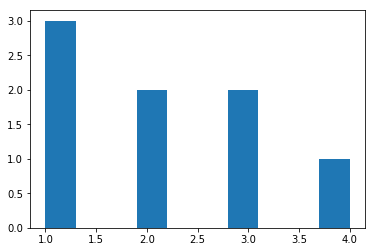

In [479]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
import matplotlib.pyplot as plt
%matplotlib inline

data = [1, 2, 1, 3, 3, 1, 4, 2]
plt.hist(data)
# plt.show() # use this instead of '%matplotlib inline' when no using Jupyetr

(array([ 370.,  155.,   83.,   19.,   10.,    4.,    2.,    3.,    0.,    1.]),
 array([    0.        ,   356.47332645,   712.9466529 ,  1069.41997935,
         1425.8933058 ,  1782.36663225,  2138.8399587 ,  2495.31328515,
         2851.7866116 ,  3208.25993805,  3564.7332645 ]),
 <a list of 10 Patch objects>)

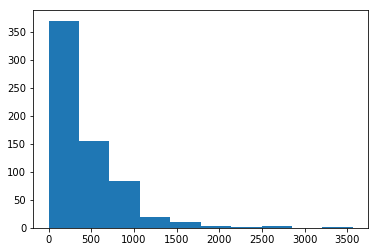

In [488]:
plt.hist(list(minutes_visited_by_account_passing.values()))

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

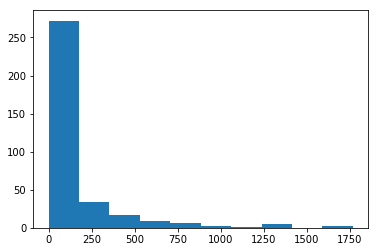

In [489]:
plt.hist(list(minutes_visited_by_account_non_passing.values()))

(array([ 516.,   97.,   23.,    4.,    3.,    3.,    0.,    0.,    0.,    1.]),
 array([  0. ,   3.6,   7.2,  10.8,  14.4,  18. ,  21.6,  25.2,  28.8,
         32.4,  36. ]),
 <a list of 10 Patch objects>)

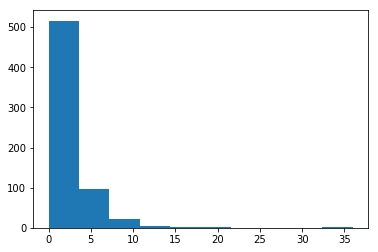

In [490]:
plt.hist(list(lessons_completed_by_account_passing.values()))

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

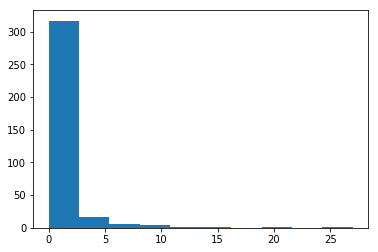

In [491]:
plt.hist(list(lessons_completed_by_account_non_passing.values()))

(array([ 87.,  82.,  79.,   0.,  91.,  77.,   0.,  85.,  78.,  68.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

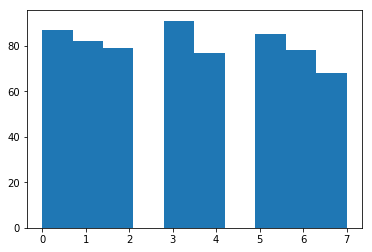

In [493]:
plt.hist(list(days_visited_classroom_by_account_passing.values()))

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

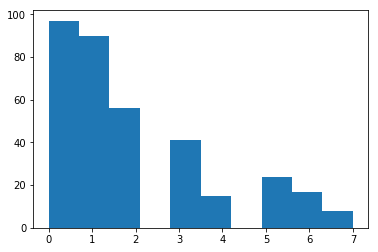

In [494]:
plt.hist(list(days_visited_classroom_by_account_non_passing.values()))

Now create write-up for the plots analyzing each of them.
https://classroom.udacity.com/courses/ud170/lessons/5430778793/concepts/53961386540923

# Stage 5 - Drawing conclusions

### Tenative conclusion: Students who pass the subway project spend more minutes on the classrom during the first week.

But is this a true difference or due to noise in teh data?

To rigorously check how likely it would be to see these results by random use statistics.

Finish this analysis with full statistical analysis.
https://classroom.udacity.com/courses/ud170/lessons/5430778793/concepts/53961386560923


### Correlation (statement above) does not imply causation

Third factors that could cause visiting the classrom and passing projects:
- Level of interest
- Background knowledge
Or this correlation could be because of causation. We just do not know. 

To know this we would need to perform experiment - A/B tests.
https://www.udacity.com/course/ab-testing--ud257

### Making predictions
Which students are likely to pass their first project?

Could take a first pass using heuristics, but getting a really good prediction this way could be difficult:
- Lots of different pieces of information to look at
- These features can have complex interactions

Machine learning can make predictions automatically.
https://www.udacity.com/course/intro-to-machine-learning--ud120

# Stage 6 - Communication

### Wynik analizy powinien być poparty analizą statystyczną, modelem ml lub testami a/b.

Even though we don't have rigorous conclusions backed by statistics or machine learning we can communicate results of our exploration.

At this stage we need to decide which of our findings are the most interesting or worth sharing and how to present them.

E.g. we can be interested in the difference between total minutes spent in classrom between students who pass the first project and those who did not.The simplest way to present it is to show the mean for both groups.

We can also be interested in days visited in each of two groups. To present it the best way would be to show histograms.

When showing visualization it is good to work on it making it as clear as possible.

## Improving Plots and Sharing Findings

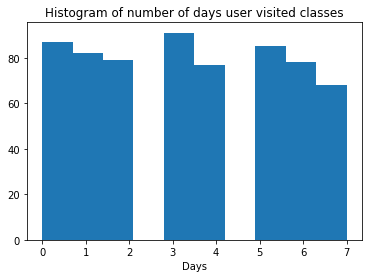

In [499]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

plt.hist(list(days_visited_classroom_by_account_passing.values()))
plt.xlabel("Days")
plt.title("Histogram of number of days user visited classes")

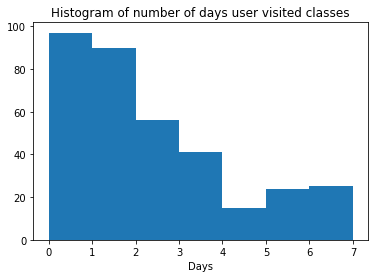

In [508]:
plt.hist(list(days_visited_classroom_by_account_non_passing.values()), bins=7)
plt.xlabel("Days")
plt.title("Histogram of number of days user visited classes")

In [501]:
import seaborn as sns

//anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


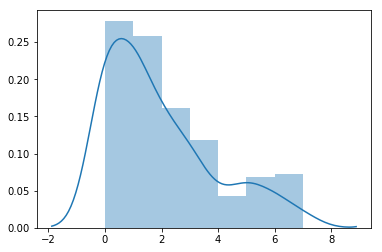

In [511]:
sns.distplot(list(days_visited_classroom_by_account_non_passing.values()), bins=7)

## Data Analysis and related terms

Data science:
- similar to data analysis
- more focus on building systems (e.g. recommendation system) where data analysis finishes rather with a blogpost or a paper
- may require more experience

Data engineering:
- more focused on data wrangling
- involves data storage and processing

Big data:
- fuzzy term for "a lot of data"
- data analysts, scientist and engineers can all work with big data.